In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_mlb_data.csv')

# Preview the first few rows of the dataset
df.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,CJ Abrams*,22,WSN,NL,89,340,316,47,82,...,0.306,0.434,0.739,105,137,5,8,3,0,0
1,2,José Abreu,36,HOU,AL,95,400,368,33,90,...,0.293,0.353,0.646,79,130,11,3,0,5,1
2,3,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,...,0.408,0.578,0.986,160,226,7,4,0,2,2
3,4,Willy Adames,27,MIL,NL,89,383,336,44,71,...,0.291,0.411,0.702,90,138,9,3,0,5,0
4,5,Riley Adams,27,WSN,NL,23,87,79,4,22,...,0.337,0.506,0.844,133,40,4,1,1,0,0


 Data Cleanup
 
I began by importing the necessary libraries and loading the dataset. The first step is to inspect the data and ensure it is in a clean and usable format.

 Handling Missing Values:

Some of the columns contain missing values, so I need to handle them. For the `HR`, `BA`, and `SLG` columns, I convert them to numeric values and fill missing values with the median value for each column. This ensures that I don't lose important data and that our analysis will be based on complete information.

 Verifying Data Cleanup:
 
After cleaning the data, I verify that there are no missing values remaining in the columns I am interested in. I can check this using `df.isnull().sum()`, which should return zero for the relevant columns.


In [28]:

# Convert relevant columns to numeric (if they are not already)
df['HR'] = pd.to_numeric(df['HR'], errors='coerce')  # Convert HR column to numeric
df['BA'] = pd.to_numeric(df['BA'], errors='coerce')  # Convert BA column to numeric
df['SLG'] = pd.to_numeric(df['SLG'], errors='coerce')  # Convert SLG column to numeric

# Select only numeric columns and fill missing values with median for those columns
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verify that there are no missing values in numeric columns
print(df.isnull().sum())


Rk      0
Name    0
Age     0
Tm      0
Lg      0
G       0
PA      0
AB      0
R       0
H       0
2B      0
3B      0
HR      0
RBI     0
SB      0
CS      0
BB      0
SO      0
BA      0
OBP     0
SLG     0
OPS     0
OPS+    0
TB      0
GDP     0
HBP     0
SH      0
SF      0
IBB     0
dtype: int64


Data Analysis

Correlation Analysis:

Once the data is cleaned, I analyze the relationships between key statistics. I began by calculating the correlation matrix for `HR`, `BA`, `OBP`, `SLG`, `OPS`, and `RBI`. This matrix helps me identify how closely these metrics are related to each other. For instance, I expect `HR` and `SLG` to be strongly correlated, as both are measures of a player's power-hitting ability.

Visualizing the Correlation Matrix:

I use a heatmap to visualize the correlation matrix. This allows me to easily spot any strong relationships between the statistics. For example, I can see how strongly Home Runs (HR) correlate with Slugging Percentage (SLG) and Batting Average (BA).


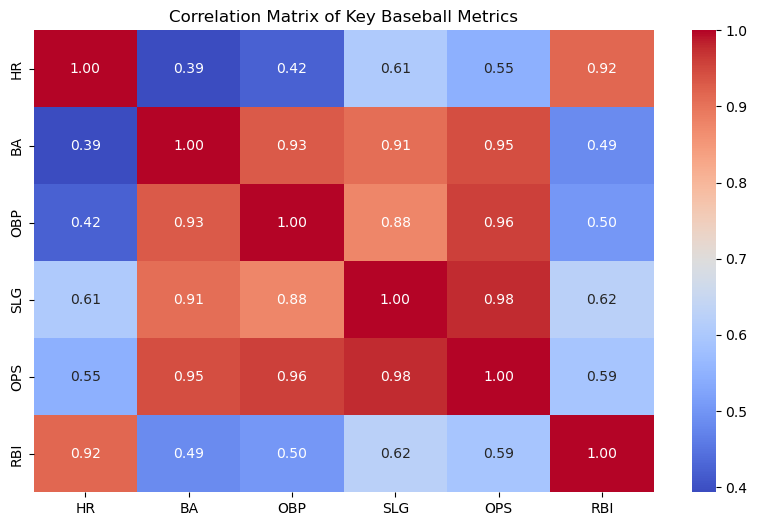

In [29]:

correlation_matrix = df[['HR', 'BA', 'OBP', 'SLG', 'OPS', 'RBI']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Key Baseball Metrics')
plt.show()

Scatter Plot of Home Runs vs. Slugging Percentage:

I further analyze the relationship between Home Runs (HR) and Slugging Percentage (SLG) using a scatter plot. The plot shows that players with more home runs tend to have higher slugging percentages.

Scatter Plot of Home Runs vs. Batting Average:

Next, I plot the relationship between Home Runs (HR) and Batting Average (BA). The plot shows a less clear relationship, suggesting that power hitters may not always have high batting averages.


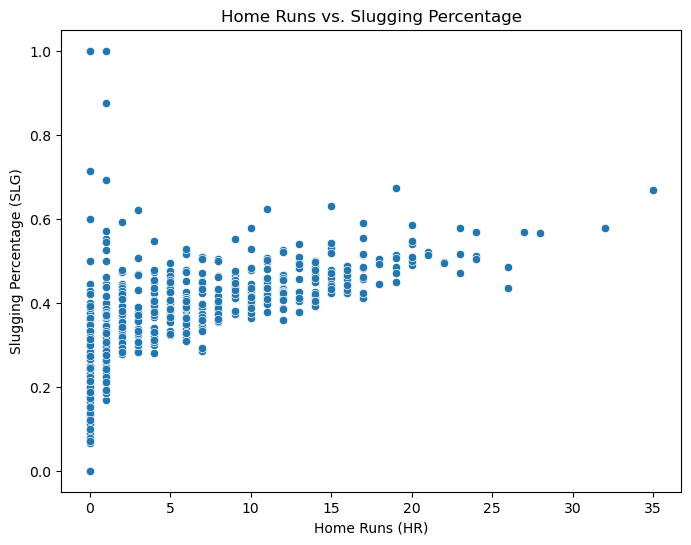

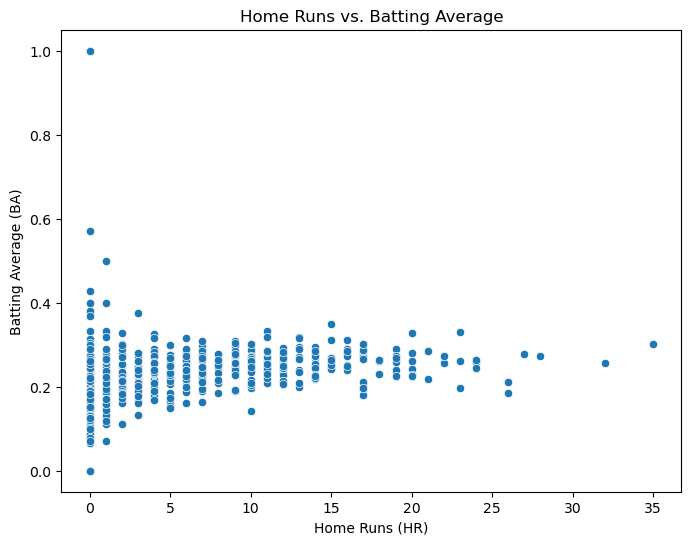

In [30]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='HR', y='SLG', data=df)
plt.title('Home Runs vs. Slugging Percentage')
plt.xlabel('Home Runs (HR)')
plt.ylabel('Slugging Percentage (SLG)')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='HR', y='BA', data=df)
plt.title('Home Runs vs. Batting Average')
plt.xlabel('Home Runs (HR)')
plt.ylabel('Batting Average (BA)')
plt.show()

Top Players Analysis

Top 10 Players by Home Runs:

I also identify the top 10 players with the highest home run totals. This analysis highlights the league's biggest power hitters.

Top 10 Players by Batting Average:

Similarly, I list the top 10 players with the highest batting averages. These players exhibit consistency in their ability to get hits.


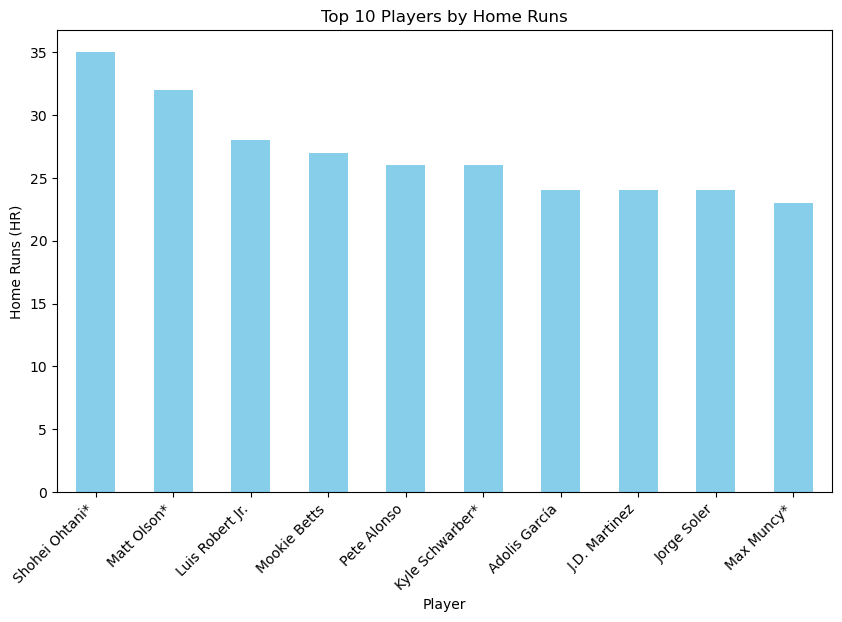

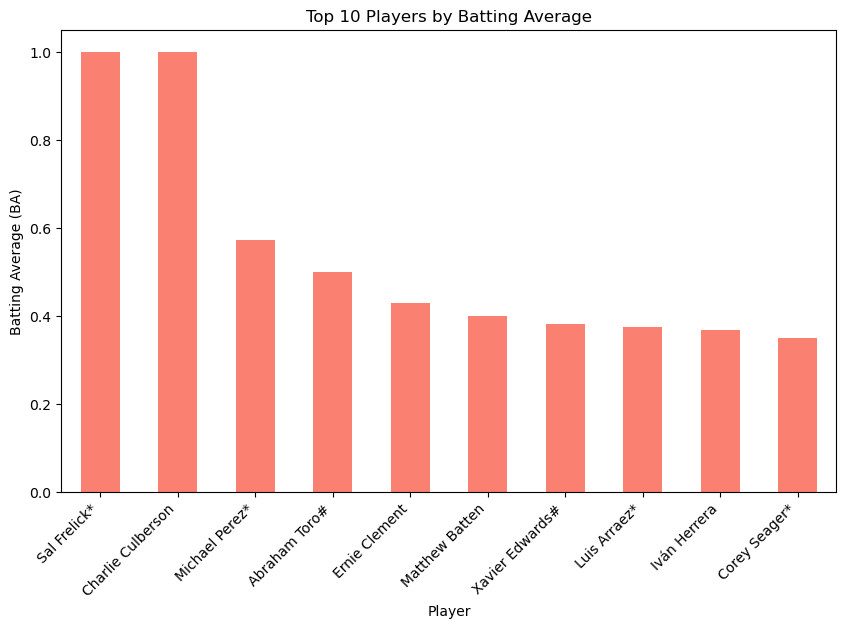

In [31]:

top_10_hr = df.groupby('Name')['HR'].sum().sort_values(ascending=False).head(10)
top_10_hr.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Players by Home Runs')
plt.xlabel('Player')
plt.ylabel('Home Runs (HR)')
plt.xticks(rotation=45, ha='right')
plt.show()


top_10_ba = df.groupby('Name')['BA'].mean().sort_values(ascending=False).head(10)
top_10_ba.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Top 10 Players by Batting Average')
plt.xlabel('Player')
plt.ylabel('Batting Average (BA)')
plt.xticks(rotation=45, ha='right')
plt.show()

Exporting Results

Finally, I export the cleaned dataset and save the analysis results. This includes:
- Saving the cleaned data to a new CSV file (`cleaned_mlb_data.csv`).
- Exporting the correlation matrix to a CSV file (`correlation_analysis.csv`).
- Saving the heatmap, scatter plots, and bar charts as image files.


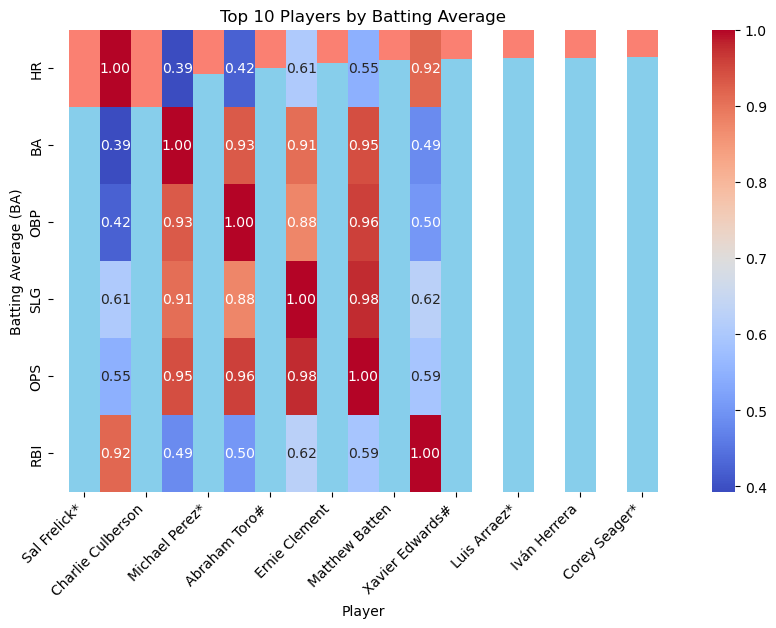

In [32]:

df.to_csv('cleaned_mlb_data.csv', index=False)


correlation_matrix.to_csv('correlation_analysis.csv')


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Key Baseball Metrics')
plt.savefig('correlation_matrix.png')

top_10_hr.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Players by Home Runs')
plt.xlabel('Player')
plt.ylabel('Home Runs (HR)')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_10_hr.png')

top_10_ba.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Top 10 Players by Batting Average')
plt.xlabel('Player')
plt.ylabel('Batting Average (BA)')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_10_ba.png')

Conclusion

In conclusion, the data cleanup process was successful, and the analysis revealed key insights:
- There is a strong positive correlation between Home Runs and Slugging Percentage.
- The relationship between Home Runs and Batting Average is less clear.
- The visualizations, such as scatter plots and bar charts, provide valuable insights into player performance.

This analysis helps me better understand the dynamics of key baseball statistics and their relationships.
